# Separation and entry elasticities

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Baseline](#toc2_)    
  - 2.1. [SAM](#toc2_1_)    
- 3. [Exogenous separations and free entry](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from consav.misc import elapsed
from FullHANKSAMModel import FullHANKSAMModelClass
from figures import create_fig, save_fig

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = FullHANKSAMModelClass(name='baseline')
model.load()

In [3]:
par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Baseline](#toc0_)

In [4]:
model.find_ss(calib_beta=False)
model.compute_jacs(skip_shocks=True)
model.find_transition_path(shocks=['shock_TFP'],do_end_check=False)

## 3. <a id='toc3_'></a>[Exogenous separations and free entry](#toc0_)

baseline: var_u = 0.87


endo_sep_free_entry: var_u/base = 0.36


exo_sep_free_entry: var_u/base = 0.04


exo_sep_sluggish_entry: var_u/base = 0.04


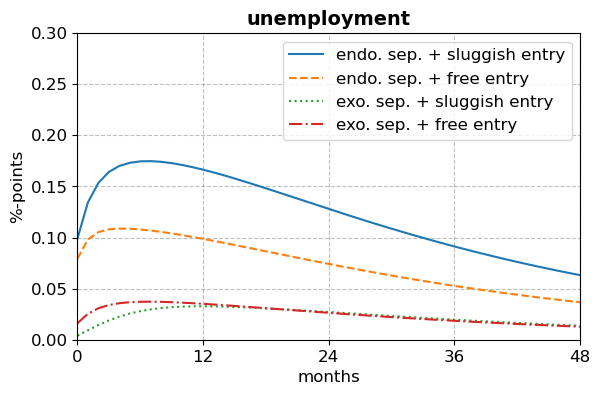

In [5]:
model_ = model
name = 'baseline'
    
model_.calc_moms_path()
var_u = model_.moms["var_u"]
print(f'{name}: var_u = {var_u:.2f}')
    
model_endo_sep_free_entry = model_.copy(name='endo_sep_free_entry')
model_endo_sep_free_entry.par.xi = np.inf
model_endo_sep_free_entry.set_macros(free_entry=True)

model_exo_sep_free_entry = model_.copy(name='exo_sep_free_entry')
model_exo_sep_free_entry.par.psi = 0.0
model_exo_sep_free_entry.par.exo_sep = True
model_exo_sep_free_entry.par.xi = np.inf
model_exo_sep_free_entry.set_macros(free_entry=True)

model_exo_sep_sluggish_entry = model_.copy(name='exo_sep_sluggish_entry')
model_exo_sep_sluggish_entry.par.psi = 0.0
model_exo_sep_sluggish_entry.par.exo_sep = True

for model__ in [model_endo_sep_free_entry,model_exo_sep_free_entry,model_exo_sep_sluggish_entry]:
    
    model__.find_ss(calib_beta=False)
    model__.compute_jacs(skip_shocks=True)
    model__.find_transition_path(shocks=['shock_TFP'],do_end_check=False)   
    model__.calc_moms_path()
    
    print(f'{model__.name}: var_u/base = {model__.moms["var_u"]/var_u:.2f}')
    
fig,ax = create_fig()

ax.plot((model_.path.u[:,0]-model_.ss.u)*100,label='endo. sep. + sluggish entry')
ax.plot((model_endo_sep_free_entry.path.u[:,0]-model_.ss.u)*100,label='endo. sep. + free entry',ls='--')
ax.plot((model_exo_sep_sluggish_entry.path.u[:,0]-model_.ss.u)*100,label='exo. sep. + sluggish entry',ls=':')
ax.plot((model_exo_sep_free_entry.path.u[:,0]-model_.ss.u)*100,label='exo. sep. + free entry',ls='-.')

ax.set_ylim([0,0.3])
save_fig(fig,ax,
            filename=f'interaction_endo_sep_sluggish_entry_{name}',
            title='unemployment',ylabel='%-points',legend=name=='baseline')

plt.show()

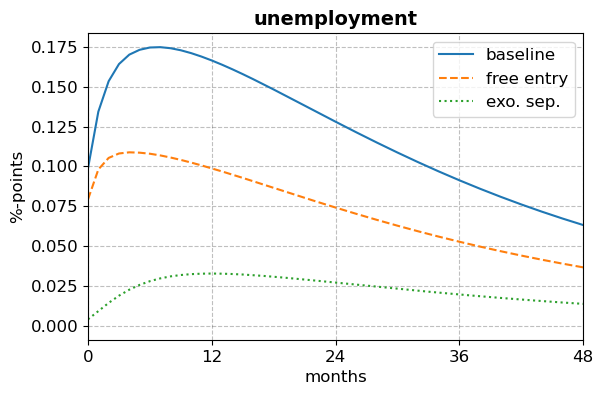

In [6]:
fig,ax = create_fig()

ax.plot((model_.path.u[:,0]-model_.ss.u)*100,label='baseline')
ax.plot((model_endo_sep_free_entry.path.u[:,0]-model_.ss.u)*100,label='free entry',ls='--')
ax.plot((model_exo_sep_sluggish_entry.path.u[:,0]-model_.ss.u)*100,label='exo. sep.',ls=':')

save_fig(fig,ax,
            filename=f'interaction_amplification_baseline',
            title='unemployment',ylabel='%-points',legend=name=='baseline')

plt.show()

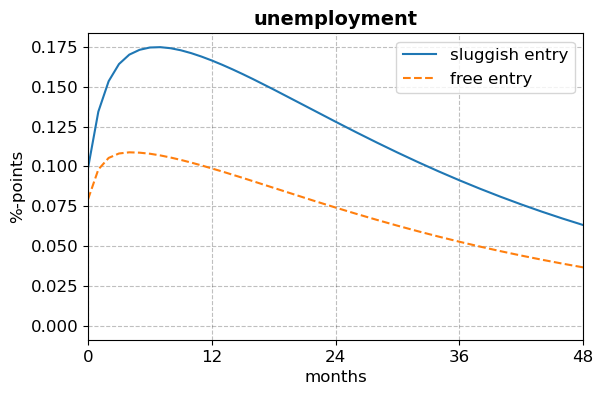

In [7]:
fig,ax = create_fig()

ax.plot((model_.path.u[:,0]-model_.ss.u)*100,label='sluggish entry',ls='-')
ax.plot((model_endo_sep_free_entry.path.u[:,0]-model_.ss.u)*100,label='free entry',ls='--')

save_fig(fig,ax,
            filename=f'interaction_endo_sep_baseline',
            title='unemployment',ylabel='%-points',legend=name=='baseline')

plt.show()

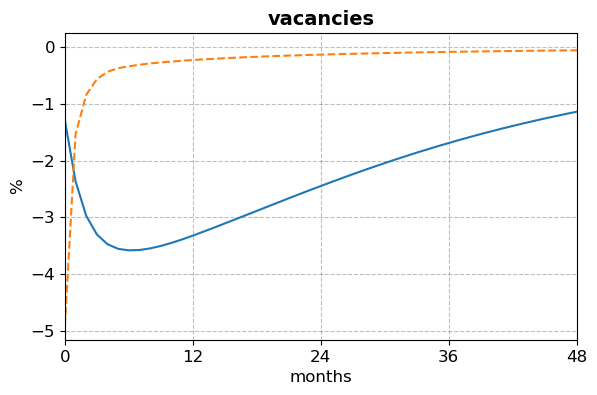

In [8]:
fig,ax = create_fig()

ax.plot((model_.path.v[:,0]/model_.ss.v-1)*100,label='sluggish entry',ls='-')
ax.plot((model_endo_sep_free_entry.path.v[:,0]/model_.ss.v-1)*100,label='free entry',ls='--')

save_fig(fig,ax,
            filename=f'interaction_endo_sep_baseline_v',
            title='vacancies',ylabel='%')

plt.show()

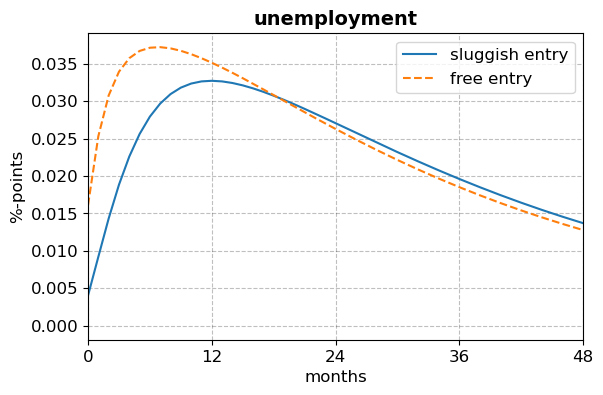

In [9]:
fig,ax = create_fig()

ax.plot((model_exo_sep_sluggish_entry.path.u[:,0]-model_.ss.u)*100,label='sluggish entry',ls='-')
ax.plot((model_exo_sep_free_entry.path.u[:,0]-model_.ss.u)*100,label='free entry',ls='--')

save_fig(fig,ax,
            filename=f'interaction_exo_sep_baseline',
            title='unemployment',ylabel='%-points',legend=name=='baseline')

plt.show()

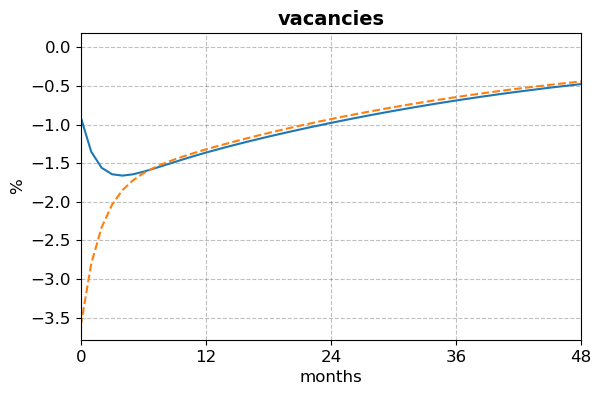

In [10]:
fig,ax = create_fig()

ax.plot((model_exo_sep_sluggish_entry.path.v[:,0]/model_.ss.v-1)*100,label='sluggish entry',ls='-')
ax.plot((model_exo_sep_free_entry.path.v[:,0]/model_.ss.v-1)*100,label='free entry',ls='--')

save_fig(fig,ax,
            filename=f'interaction_exo_sep_baseline_v',
            title='vacancies',ylabel='%')

plt.show()